In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


In [277]:
df = pd.read_csv('data/all_combined.csv')
df.drop(['환자번호','CT판독','INCLUSION','EXCLUSION','VISIBLE_STONE_CT','CT','ERCP','MRCP'], axis=1, inplace=True)
df = pd.get_dummies(data=df, columns=['ANATOMY'], drop_first=True)
df

,DUCT_DILIATATION_8MM,DUCT_DILIATATION_10MM,DUCT_DILIATATION,SBP,DBP,HR,RR,BT,AGE,GENDER,...,PTBD,EUS,PTGBD,PANCREATITIS,REAL_STONE,ANATOMY_B-II,ANATOMY_B-II\ncholecystectomy,ANATOMY_Gastrojejunostomy,ANATOMY_Total,ANATOMY_cholecystectomy
0,1.0,1.0,1.0,97.566667,55.166667,90.741935,24.954545,37.617391,74.0,1.0,...,1.0,NaN,NaN,0.0,1.0,0,0,0,0,0
1,1.0,1.0,1.0,114.166667,70.666667,90.333333,17.666667,37.477778,66.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,1.0,1.0,1.0,107.125000,68.000000,103.250000,19.125000,37.877778,88.0,0.0,...,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0
3,1.0,0.0,1.0,126.800000,59.600000,65.000000,19.600000,37.590909,94.0,0.0,...,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0
4,1.0,1.0,1.0,121.000000,72.000000,76.000000,18.000000,37.000000,92.0,1.0,...,NaN,1.0,NaN,0.0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.0,NaN,1.0,170.466667,76.800000,71.000000,20.000000,37.541667,87.0,1.0,...,NaN,NaN,NaN,1.0,0.0,0,0,0,0,0
193,1.0,NaN,1.0,103.888889,76.333333,88.000000,20.111111,37.566667,78.0,0.0,...,NaN,1.0,NaN,0.0,0.0,0,0,0,0,0
194,0.0,NaN,0.0,115.500000,67.500000,75.000000,19.142857,36.642857,68.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0
195,1.0,NaN,1.0,170.000000,87.307692,70.923077,17.272727,36.750000,54.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0


In [278]:
count_real_stone_1 = len(df[df['REAL_STONE'] == 1])
count_real_stone_0 = len(df[df['REAL_STONE'] == 0])

print("REAL_STONE이 1인 행의 개수:", count_real_stone_1)
print("REAL_STONE이 0인 행의 개수:", count_real_stone_0)

REAL_STONE이 1인 행의 개수: 137
REAL_STONE이 0인 행의 개수: 60


In [279]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,DUCT_DILIATATION_8MM,DUCT_DILIATATION_10MM,DUCT_DILIATATION,SBP,DBP,HR,RR,BT,AGE,GENDER,...,PTBD,EUS,PTGBD,PANCREATITIS,REAL_STONE,ANATOMY_B-II,ANATOMY_B-II\ncholecystectomy,ANATOMY_Gastrojejunostomy,ANATOMY_Total,ANATOMY_cholecystectomy
0,1.0,1.000000,1.0,97.566667,55.166667,90.741935,24.954545,37.617391,74.0,1.0,...,1.000000,0.888889,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.000000,1.0,114.166667,70.666667,90.333333,17.666667,37.477778,66.0,1.0,...,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.000000,1.0,107.125000,68.000000,103.250000,19.125000,37.877778,88.0,0.0,...,0.866667,0.888889,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.000000,1.0,126.800000,59.600000,65.000000,19.600000,37.590909,94.0,0.0,...,0.866667,0.888889,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.000000,1.0,121.000000,72.000000,76.000000,18.000000,37.000000,92.0,1.0,...,0.866667,1.000000,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.0,0.707865,1.0,170.466667,76.800000,71.000000,20.000000,37.541667,87.0,1.0,...,0.866667,0.888889,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0
193,1.0,0.707865,1.0,103.888889,76.333333,88.000000,20.111111,37.566667,78.0,0.0,...,0.866667,1.000000,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.707865,0.0,115.500000,67.500000,75.000000,19.142857,36.642857,68.0,1.0,...,0.866667,0.888889,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,1.0,0.707865,1.0,170.000000,87.307692,70.923077,17.272727,36.750000,54.0,0.0,...,0.866667,0.888889,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## oversampling

In [280]:
# Real_stone이 0인 경우와 1인 경우로 데이터 분할
data_real_stone_0 = df_imputed[df_imputed['REAL_STONE'] == 0]
data_real_stone_1 = df_imputed[df_imputed['REAL_STONE'] == 1]

# 클래스 비율 계산
ratio = len(data_real_stone_1) / len(data_real_stone_0)

# 데이터를 반반으로 샘플링하여 데이터셋 조정
data_real_stone_0_resampled = resample(data_real_stone_0, n_samples=len(data_real_stone_1), random_state=42)

# 다시 합치기
data_balanced = pd.concat([data_real_stone_0_resampled, data_real_stone_1])

# 더미 변수로 변환된 데이터에서 X와 y 추출
X = data_balanced.drop('REAL_STONE', axis=1)
y = data_balanced['REAL_STONE'].values

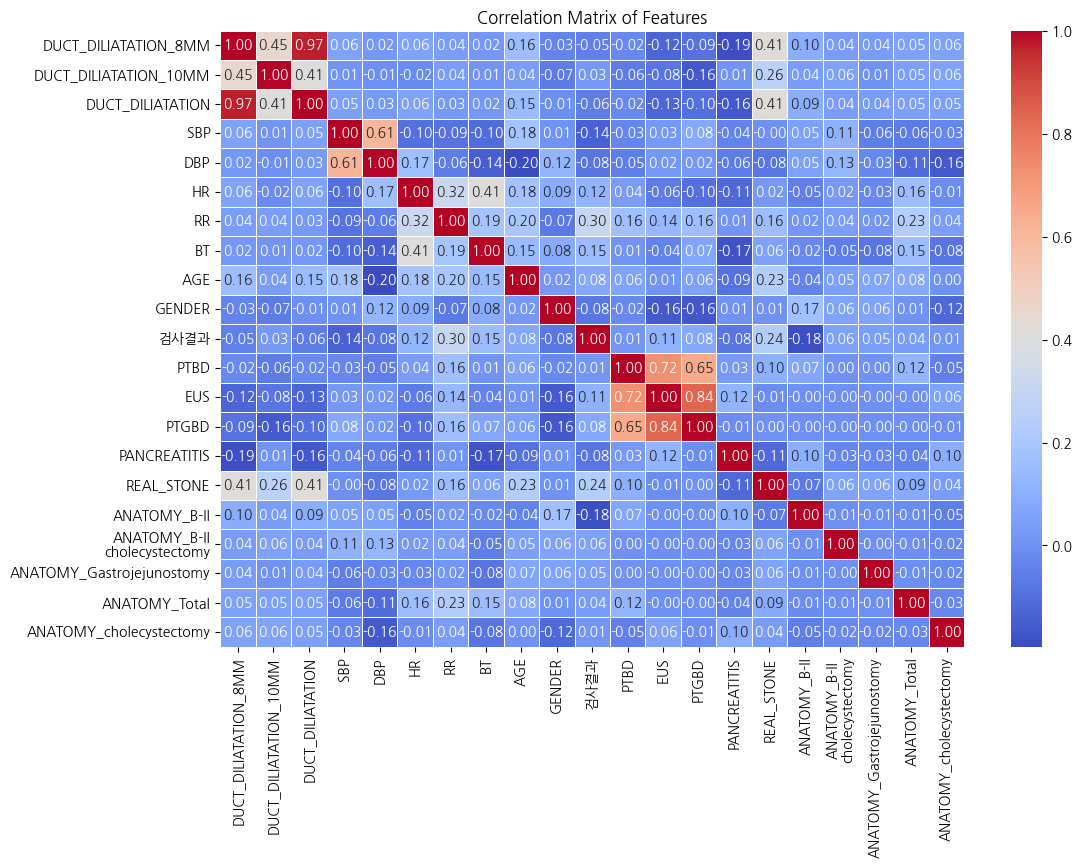

In [281]:
correlation_matrix = data_balanced.corr()

# heatmap으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [282]:
correlation_matrix = data_balanced.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None)

,DUCT_DILIATATION_8MM,DUCT_DILIATATION_10MM,DUCT_DILIATATION,SBP,DBP,HR,RR,BT,AGE,GENDER,검사결과,PTBD,EUS,PTGBD,PANCREATITIS,REAL_STONE,ANATOMY_B-II,ANATOMY_B-II cholecystectomy,ANATOMY_Gastrojejunostomy,ANATOMY_Total,ANATOMY_cholecystectomy
DUCT_DILIATATION_8MM,1.000000,0.450849,0.971756,0.056630,0.022255,0.063546,0.037440,0.022345,0.156258,-0.034922,-0.049539,-0.019842,-0.123555,-0.093552,-0.190238,0.414599,0.096668,0.036133,0.036133,0.051194,0.058283
DUCT_DILIATATION_10MM,0.450849,1.000000,0.407106,0.011178,-0.009050,-0.018513,0.039064,0.009717,0.037810,-0.065770,0.027097,-0.064122,-0.082625,-0.158833,0.009090,0.262119,0.040024,0.060080,0.007441,0.047832,0.060719
DUCT_DILIATATION,0.971756,0.407106,1.000000,0.049328,0.029169,0.058208,0.025728,0.018280,0.148659,-0.008668,-0.060466,-0.019282,-0.125786,-0.095461,-0.161282,0.411998,0.093938,0.035113,0.035113,0.049748,0.050759
SBP,0.056630,0.011178,0.049328,1.000000,0.609485,-0.095051,-0.087009,-0.104774,0.181920,0.008761,-0.136721,-0.031418,0.026850,0.079356,-0.040368,-0.003153,0.052043,0.107989,-0.055842,-0.064948,-0.029575
DBP,0.022255,-0.009050,0.029169,0.609485,1.000000,0.166664,-0.058721,-0.143971,-0.196858,0.122447,-0.084010,-0.053918,0.021559,0.019384,-0.058677,-0.079927,0.051640,0.127787,-0.026980,-0.105740,-0.155187
HR,0.063546,-0.018513,0.058208,-0.095051,0.166664,1.000000,0.317012,0.407133,0.179598,0.093450,0.121683,0.035231,-0.062106,-0.096180,-0.112712,0.023372,-0.051309,0.024503,-0.027636,0.157822,-0.011539
RR,0.037440,0.039064,0.025728,-0.087009,-0.058721,0.317012,1.000000,0.187403,0.196119,-0.068761,0.304815,0.163511,0.135132,0.161537,0.009630,0.156440,0.017615,0.042366,0.016544,0.231972,0.041524
BT,0.022345,0.009717,0.018280,-0.104774,-0.143971,0.407133,0.187403,1.000000,0.148680,0.084883,0.151356,0.011398,-0.042103,0.065967,-0.174717,0.058817,-0.019691,-0.054699,-0.081546,0.154142,-0.081068
AGE,0.156258,0.037810,0.148659,0.181920,-0.196858,0.179598,0.196119,0.148680,1.000000,0.019080,0.076734,0.062835,0.010378,0.055412,-0.092429,0.234381,-0.038483,0.047856,0.066966,0.081341,0.003164
GENDER,-0.034922,-0.065770,-0.008668,0.008761,0.122447,0.093450,-0.068761,0.084883,0.019080,1.000000,-0.079465,-0.019871,-0.158048,-0.164813,0.008705,0.007312,0.171665,0.064166,0.064166,0.005016,-0.115589


## Undersampling

In [234]:
# Real_stone이 0인 경우와 1인 경우로 데이터 분할
data_real_stone_0 = df_imputed[df_imputed['REAL_STONE'] == 0]
data_real_stone_1 = df_imputed[df_imputed['REAL_STONE'] == 1]

# 클래스 비율 계산
ratio = len(data_real_stone_0) / len(data_real_stone_1)

# Real_stone이 1인 데이터 중에서 Real_stone이 0인 데이터의 개수만큼 랜덤으로 샘플링
data_real_stone_1_resampled = data_real_stone_1.sample(n=len(data_real_stone_0), random_state=42)

# Real_stone이 0인 데이터와 샘플링된 Real_stone이 1인 데이터 결합
data_balanced = pd.concat([data_real_stone_0, data_real_stone_1_resampled])

# 더미 변수로 변환된 데이터에서 X와 y 추출
X = data_balanced.drop('REAL_STONE', axis=1)
y = data_balanced['REAL_STONE'].values

data_balanced

,DUCT_DILIATATION_8MM,DUCT_DILIATATION_10MM,DUCT_DILIATATION,SBP,DBP,HR,RR,BT,AGE,GENDER,...,PTBD,EUS,PTGBD,PANCREATITIS,REAL_STONE,ANATOMY_B-II,ANATOMY_B-II\ncholecystectomy,ANATOMY_Gastrojejunostomy,ANATOMY_Total,ANATOMY_cholecystectomy
1,1.0,1.000000,1.0,114.166667,70.666667,90.333333,17.666667,37.477778,66.0,1.0,...,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.000000,1.0,107.636364,62.909091,70.636364,18.666667,36.644444,63.0,0.0,...,0.866667,1.000000,0.75,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.000000,1.0,124.714286,76.857143,70.166667,18.666667,36.590000,61.0,1.0,...,0.866667,0.888889,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.0,1.000000,1.0,152.769231,88.384615,59.142857,20.000000,36.637500,59.0,0.0,...,0.866667,0.888889,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,1.000000,1.0,170.000000,109.000000,84.000000,20.000000,36.000000,64.0,1.0,...,0.866667,0.888889,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0.707865,1.0,167.466667,100.666667,82.230769,19.777778,36.822222,90.0,1.0,...,0.866667,0.888889,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0
150,1.0,0.707865,1.0,108.500000,68.500000,72.800000,20.000000,36.350000,89.0,1.0,...,0.866667,0.888889,0.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0
13,1.0,0.000000,1.0,102.250000,66.750000,64.000000,20.000000,36.325000,70.0,1.0,...,0.866667,0.888889,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0
47,1.0,0.000000,1.0,160.000000,96.000000,100.965517,20.000000,37.200000,76.0,0.0,...,0.866667,0.888889,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [283]:
count_real_stone_1 = len(data_balanced[data_balanced['REAL_STONE'] == 1])
count_real_stone_0 = len(data_balanced[data_balanced['REAL_STONE'] == 0])

print("REAL_STONE이 1인 행의 개수:", count_real_stone_1)
print("REAL_STONE이 0인 행의 개수:", count_real_stone_0)

REAL_STONE이 1인 행의 개수: 137
REAL_STONE이 0인 행의 개수: 137


In [284]:
# REAL_STONE이 1인 행의 개수
count_real_stone_1 = len(data_balanced[data_balanced['REAL_STONE'] == 1])

# REAL_STONE이 0인 행의 개수
count_real_stone_0 = len(data_balanced[data_balanced['REAL_STONE'] == 0])

print("REAL_STONE이 1인 행의 개수:", count_real_stone_1)
print("REAL_STONE이 0인 행의 개수:", count_real_stone_0)


REAL_STONE이 1인 행의 개수: 137
REAL_STONE이 0인 행의 개수: 137


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, # train/test 비율
                                                    stratify=y, # y class 비율에 맞게 나누기
                                                    random_state=42) # 여러번 수행해도 같은 결과 나오게 고정

In [286]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
lg_pred_proba = lg.predict_proba(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)

# Random Forest
rfc = RandomForestClassifier(n_estimators=3, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_pred_proba = rfc.predict_proba(X_test)

# XGBoost
xgb = XGBClassifier(n_estimators=3, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_pred_proba = svm.predict_proba(X_test)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)

# K-Means Clustering-based Classifier
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_test)

In [288]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
import pandas as pd

def evaluate_classification_model(model_name, y_pred, y_pred_proba, y_true, X_test):
    """
    Evaluate various classification metrics of a classification model and 
    also output the predicted probabilities for each class.
    
    Args:
    - model_name (str): Name of the classification model.
    - y_pred (array-like): Predicted labels.
    - y_pred_proba (array-like): Predicted probabilities for each class.
    - y_true (array-like): True labels.
    - X_test (DataFrame): Test data including the columns of interest.
    
    Returns:
    - None
    """
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'ROC AUC Score': roc_auc_score(y_true, y_pred)
    }
    
    print(f"Evaluation metrics for {model_name}:")
    metrics_df = pd.DataFrame(metrics, index=[0])
    display(metrics_df)
    print("\n")

In [289]:
X_test_df = pd.DataFrame(X_test)

evaluate_classification_model('LogisticRegression', lg_pred, lg_pred_proba, y_test, X_test_df)
evaluate_classification_model('K-Nearest Neighbor', knn_pred, knn_pred_proba, y_test, X_test_df)
evaluate_classification_model('DecisionTree', dt_pred, dt_pred_proba, y_test, X_test_df)
evaluate_classification_model('RandomForest', rfc_pred, rfc_pred_proba, y_test, X_test_df)
evaluate_classification_model('XGBoost', xgb_pred, xgb_pred_proba, y_test, X_test_df)
evaluate_classification_model('Support Vector Machine', svm_pred, svm_pred_proba, y_test, X_test_df)
evaluate_classification_model('Naive Bayes', nb_pred, nb_pred_proba, y_test, X_test_df)
evaluate_classification_model('K-Means Clustering-based Classifier', kmeans_pred, None, y_test, X_test_df)

Evaluation metrics for LogisticRegression:


,Accuracy,Recall,F1 Score,Precision,ROC AUC Score
0,0.626506,0.707317,0.651685,0.604167,0.627468




Evaluation metrics for K-Nearest Neighbor:


,Accuracy,Recall,F1 Score,Precision,ROC AUC Score
0,0.578313,0.463415,0.520548,0.59375,0.576945




Evaluation metrics for DecisionTree:


,Accuracy,Recall,F1 Score,Precision,ROC AUC Score
0,0.73494,0.634146,0.702703,0.787879,0.73374




Evaluation metrics for RandomForest:


,Accuracy,Recall,F1 Score,Precision,ROC AUC Score
0,0.819277,0.780488,0.810127,0.842105,0.818815




Evaluation metrics for XGBoost:


,Accuracy,Recall,F1 Score,Precision,ROC AUC Score
0,0.73494,0.682927,0.717949,0.756757,0.734321




Evaluation metrics for Support Vector Machine:


,Accuracy,Recall,F1 Score,Precision,ROC AUC Score
0,0.614458,0.804878,0.673469,0.578947,0.616725




Evaluation metrics for Naive Bayes:


,Accuracy,Recall,F1 Score,Precision,ROC AUC Score
0,0.662651,0.804878,0.702128,0.622642,0.664344




Evaluation metrics for K-Means Clustering-based Classifier:


,Accuracy,Recall,F1 Score,Precision,ROC AUC Score
0,0.638554,0.853659,0.7,0.59322,0.641115


In [290]:
ser_rfc = pd.Series(rfc.feature_importances_, index=X.columns)
top10_rfc = ser_rfc.sort_values(ascending=False)[:10]
print("[Random Forest Classifier]")
print(top10_rfc)

ser_dt = pd.Series(dt.feature_importances_, index=X.columns)
top10_dt = ser_dt.sort_values(ascending=False)[:10]
print("[Decision Tree]")
print(top10_dt)

ser_xgb = pd.Series(xgb.feature_importances_, index=X.columns)
top10_xgb = ser_xgb.sort_values(ascending=False)[:10]
print("[XGBoost]")
print(top10_xgb)

[Random Forest Classifier]
AGE                      0.207243
검사결과                     0.143509
BT                       0.131723
SBP                      0.125003
DUCT_DILIATATION         0.107063
DBP                      0.077548
HR                       0.051011
DUCT_DILIATATION_10MM    0.040196
RR                       0.032236
PTGBD                    0.018928
dtype: float64
[Decision Tree]
DUCT_DILIATATION_8MM     0.213171
AGE                      0.201027
검사결과                     0.149338
HR                       0.146662
BT                       0.128181
SBP                      0.106014
DUCT_DILIATATION_10MM    0.035263
GENDER                   0.015707
RR                       0.004639
PANCREATITIS             0.000000
dtype: float64
[XGBoost]
DUCT_DILIATATION_8MM     0.413080
검사결과                     0.241714
BT                       0.068484
AGE                      0.058013
DUCT_DILIATATION_10MM    0.056926
HR                       0.056352
RR                       0.042145

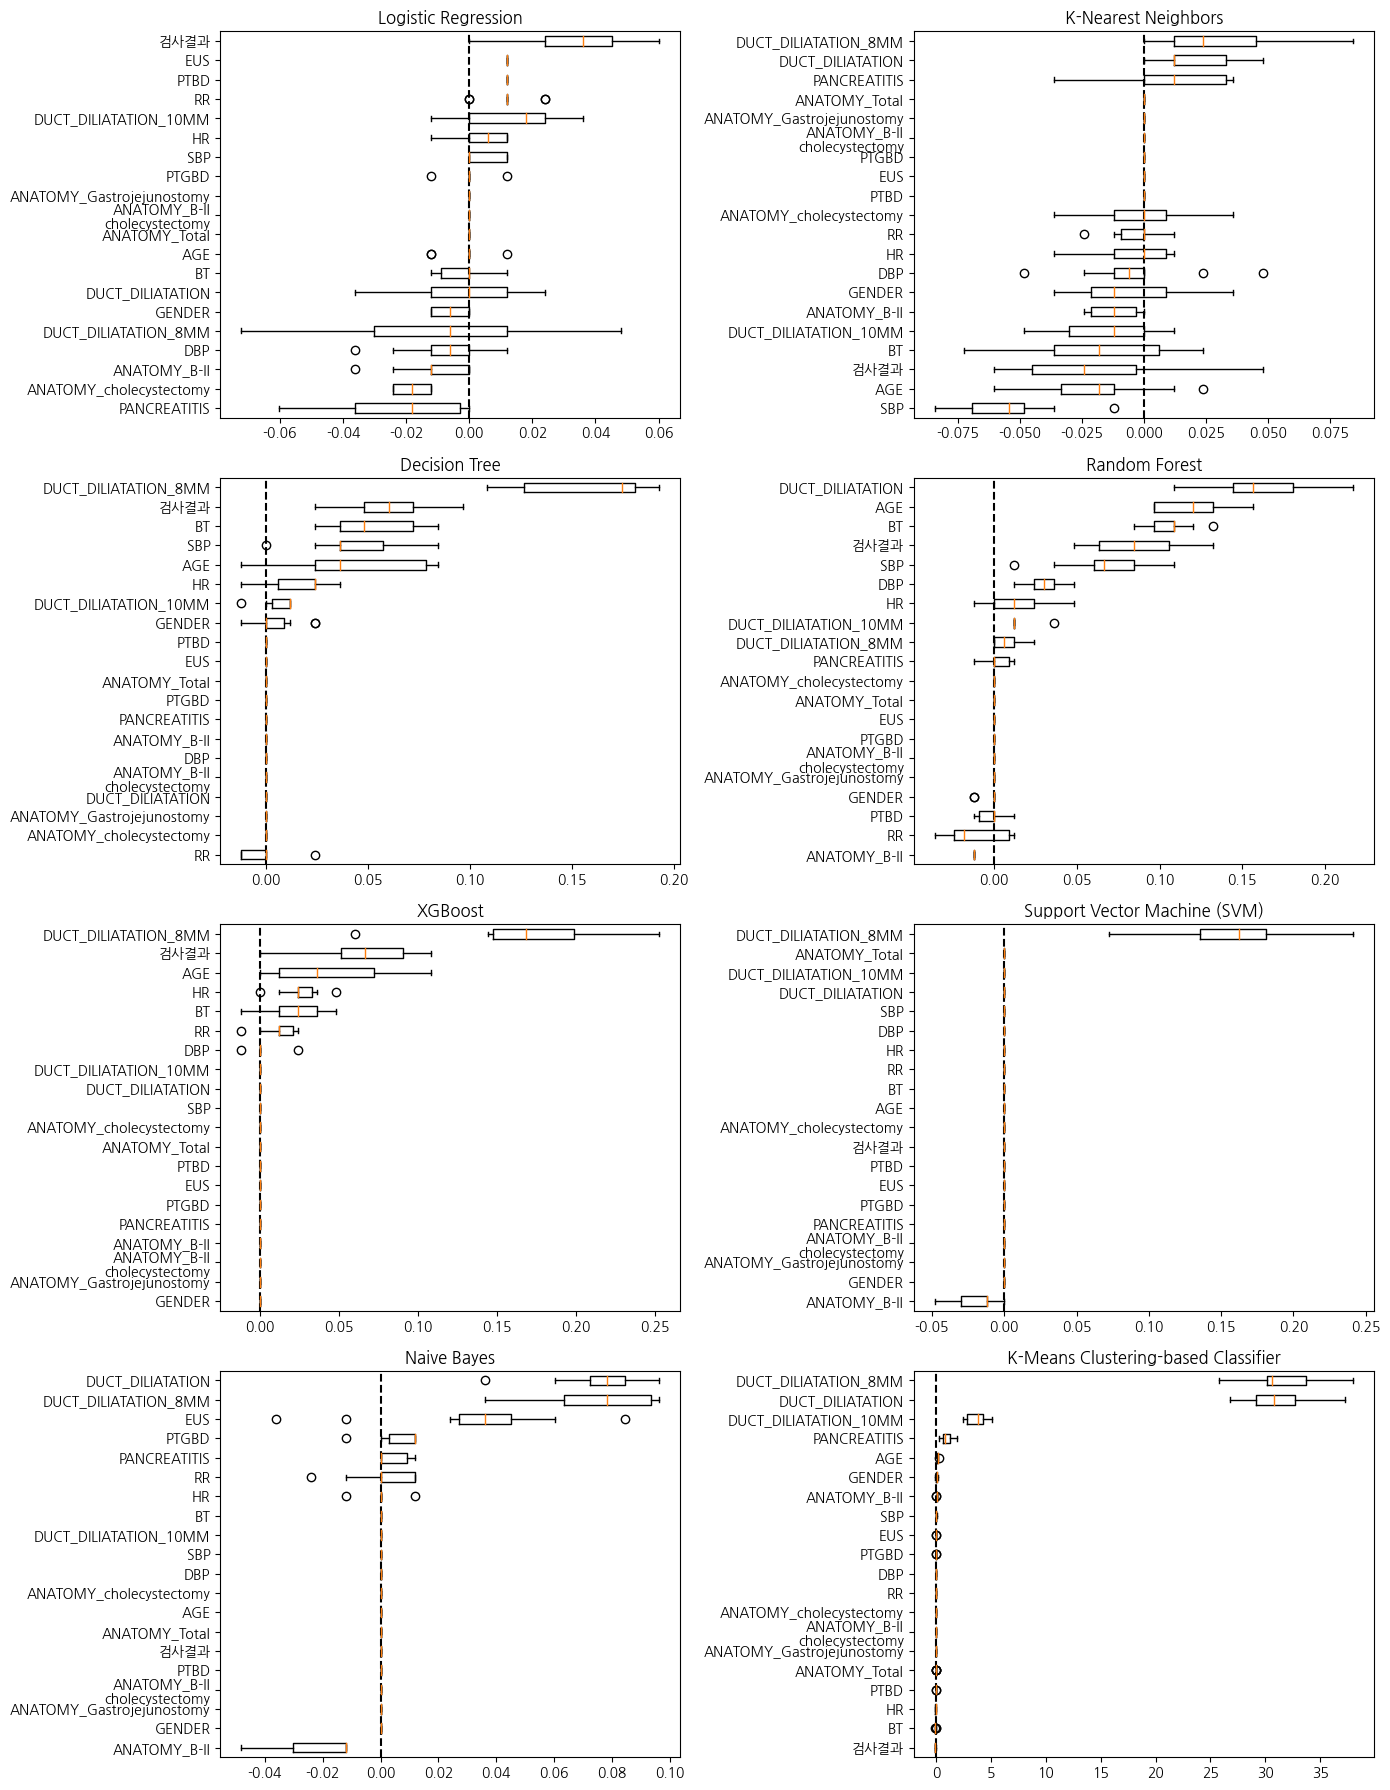

In [291]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(clf, X, y, feature_names, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=feature_names[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

# Instantiate all models
lg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
rfc = RandomForestClassifier(n_estimators=3, random_state=42)
xgb = XGBClassifier(n_estimators=3, random_state=42)
svm = SVC(kernel='linear', probability=True)
nb = GaussianNB()
kmeans = KMeans(n_clusters=2, random_state=42)

# Train all models
lg.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rfc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
kmeans.fit(X_train)

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))

# Plot permutation importance for each model
plot_permutation_importance(lg, X_test, y_test, X.columns, axs[0, 0])
axs[0, 0].set_title("Logistic Regression")

plot_permutation_importance(knn, X_test, y_test, X.columns, axs[0, 1])
axs[0, 1].set_title("K-Nearest Neighbors")

plot_permutation_importance(dt, X_test, y_test, X.columns, axs[1, 0])
axs[1, 0].set_title("Decision Tree")

plot_permutation_importance(rfc, X_test, y_test, X.columns, axs[1, 1])
axs[1, 1].set_title("Random Forest")

plot_permutation_importance(xgb, X_test, y_test, X.columns, axs[2, 0])
axs[2, 0].set_title("XGBoost")

plot_permutation_importance(svm, X_test, y_test, X.columns, axs[2, 1])
axs[2, 1].set_title("Support Vector Machine (SVM)")

plot_permutation_importance(nb, X_test, y_test, X.columns, axs[3, 0])
axs[3, 0].set_title("Naive Bayes")

# Note: K-Means does not have a predict_proba method
plot_permutation_importance(kmeans, X_test, y_test, X.columns, axs[3, 1])
axs[3, 1].set_title("K-Means Clustering-based Classifier")

# Adjust layout
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout()
plt.show()

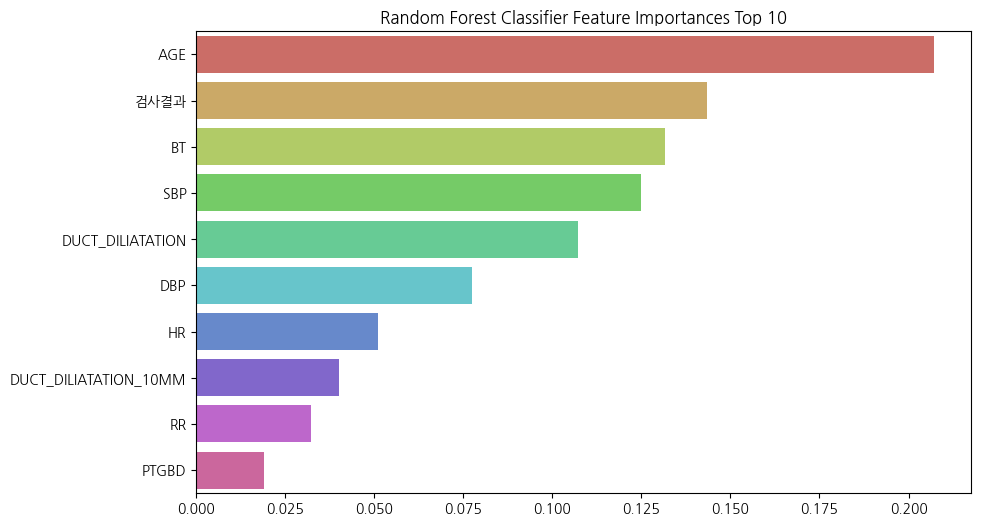

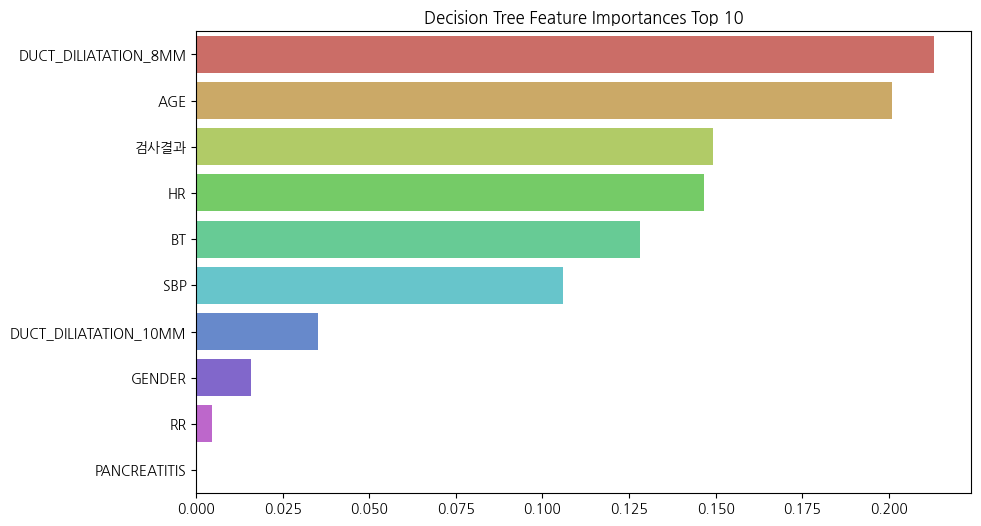

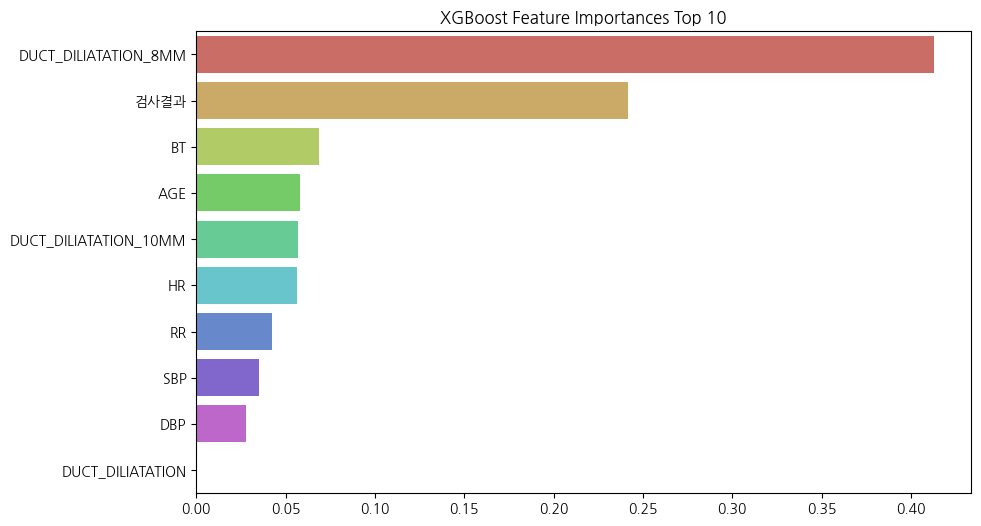

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
hls_palette = sns.color_palette("hls", 10)

plt.figure(figsize=(10,6))
plt.title('Random Forest Classifier Feature Importances Top 10')
sns.barplot(x=top10_rfc, y=top10_rfc.index, palette=hls_palette)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Decision Tree Feature Importances Top 10')
sns.barplot(x=top10_dt, y=top10_dt.index, palette=hls_palette)
plt.show()

plt.figure(figsize=(10,6))
plt.title('XGBoost Feature Importances Top 10')
sns.barplot(x=top10_xgb, y=top10_xgb.index, palette=hls_palette)
plt.show()